# SGP Class

This is a tutorial on how to use the ``SGP`` class.

In [1]:
import buqeyemodel as bq
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
%matplotlib inline

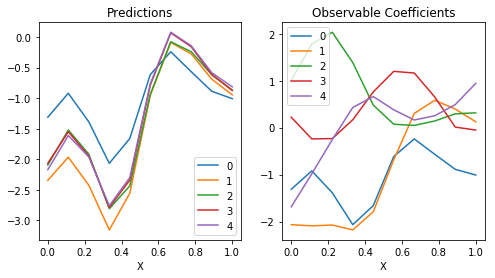

In [8]:
np.random.seed(1)
X = np.linspace(0, 1, 10)[:, None]
n_orders = 5
orders = np.arange(0, n_orders)
ls = 0.2
ratio = 0.5
sd = 1
beta = 0

data = bq.toy_data(X=X, orders=orders, ratio=ratio, beta=beta, sd=sd, ls=ls)
coeffs = bq.coefficients(partials=data, ratio=ratio)

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
for i in range(n_orders):
    ax[0].plot(X.ravel(), data[i], label=i)
    ax[1].plot(X.ravel(), coeffs[i], label=i)
ax[0].set_title('Predictions')
ax[1].set_title('Observable Coefficients')
ax[0].set_xlabel('X')
ax[1].set_xlabel('X')
ax[0].legend();
ax[1].legend();

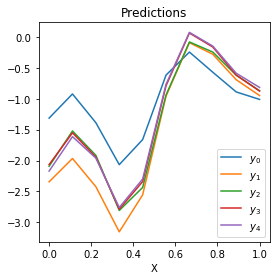

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
for i in range(n_orders):
    ax.plot(X.ravel(), data[i], label=r'$y_{}$'.format(i))
ax.set_title('Predictions')
ax.set_xlabel('X')
ax.legend();
fig.tight_layout()
fig.savefig('Predictions.pdf')

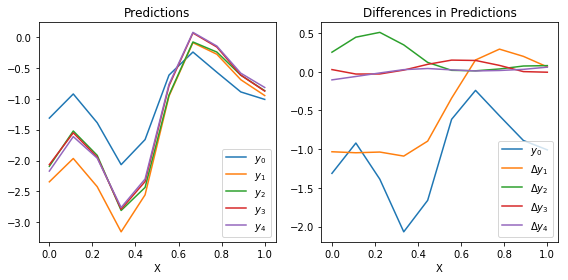

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
diffs = np.diff(data, axis=0)
for i in range(n_orders):
    ax[0].plot(X.ravel(), data[i], label=r'$y_{}$'.format(i))
ax[1].plot(X.ravel(), data[0], label=r'$y_{}$'.format(0))
for i in range(1, n_orders):
    ax[1].plot(X.ravel(), diffs[i-1], label=r'$\Delta y_{}$'.format(i))
ax[0].set_title('Predictions')
ax[1].set_title('Differences in Predictions')
ax[0].set_xlabel('X')
ax[1].set_xlabel('X')
ax[0].legend();
ax[1].legend();
fig.tight_layout()
fig.savefig('Predictions_Diffs.pdf')

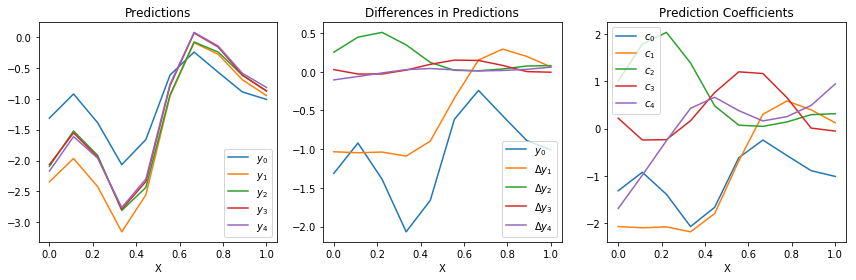

In [20]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
diffs = np.diff(data, axis=0)
for i in range(n_orders):
    ax[0].plot(X.ravel(), data[i], label=r'$y_{}$'.format(i))
    ax[2].plot(X.ravel(), coeffs[i], label=r'$c_{}$'.format(i))
ax[1].plot(X.ravel(), data[0], label=r'$y_{}$'.format(0))
for i in range(1, n_orders):
    ax[1].plot(X.ravel(), diffs[i-1], label=r'$\Delta y_{}$'.format(i))
ax[0].set_title('Predictions')
ax[1].set_title('Differences in Predictions')
ax[2].set_title('Prediction Coefficients')
ax[0].set_xlabel('X')
ax[1].set_xlabel('X')
ax[2].set_xlabel('X')
ax[0].legend();
ax[1].legend();
ax[2].legend();
fig.tight_layout()
fig.savefig('Predictions_Diffs_Coeffs.pdf')

True
25.3 23.2851969311 [-0.19539661] [[ 0.06312975]]


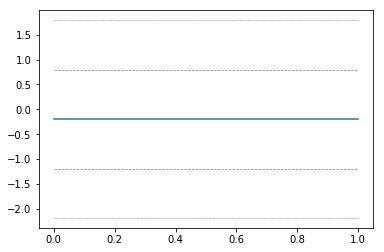

In [3]:
Xnew = np.linspace(0, 1, 200)[:, None]
model = bq.SGP(shape=0.3, scale=0.2)
model.observe(X=X, y=coeffs, ls=ls)
pred, pred_dob = model.predict(Xnew=Xnew, dob=[0.68, 0.95])
print(np.allclose(coeffs, model.y))
print(model.shape(), model.scale(), model.means(), model.cov())

plt.plot(Xnew, pred)
plt.plot(Xnew, pred_dob[0].T, c='gray', ls='--', lw=0.7)
plt.plot(Xnew, pred_dob[1].T, c='gray', ls='--', lw=0.5);

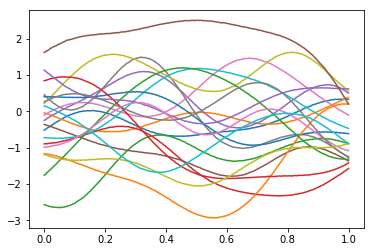

In [4]:
dist = model.predictive(Xnew=Xnew, corr=True)
random_preds = dist.rvs(20)
plt.plot(Xnew, random_preds.T);

(2, 2, 100)


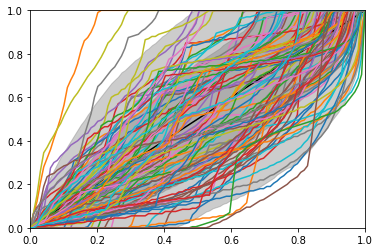

In [5]:
# validation_data = bq.toy_data(X=Xnew, orders=list(range(100)), ratio=ratio, sd=sd, ls=ls)
# validation_coeffs = bq.coefficients(partials=validation_data, ratio=ratio)
validation_coeffs = bq.generate_coefficients(X=Xnew, size=100, beta=beta, sd=sd, ls=ls)

# dobs = np.arange(0.1, 1, 0.1)
dobs = np.linspace(0, 1, 100)
# ref_dobs = np.arange(0.01, 1, 0.01)
band_dobs = np.linspace(0, 1, 100)
band_intervals = np.array([0.68, 0.95])
D_CI, bands = model.credible_diagnostic(
    data=validation_coeffs, dobs=dobs, band_intervals=band_intervals, band_dobs=band_dobs, samples=1e4, Xnew=Xnew)
print(bands.shape)
fig, ax = plt.subplots(1, 1)
ax.plot([0, 1], [0, 1], c='k')
ax.plot(dobs, D_CI.T)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1]);
ax.fill_between(band_dobs, y1=bands[0, 0], y2=bands[0, 1], alpha=0.4, color='gray')
ax.fill_between(band_dobs, y1=bands[1, 0], y2=bands[1, 1], alpha=0.4, color='gray');